<a href="https://colab.research.google.com/github/O0O0O0O0OP48763/123/blob/master/DisFEM_HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

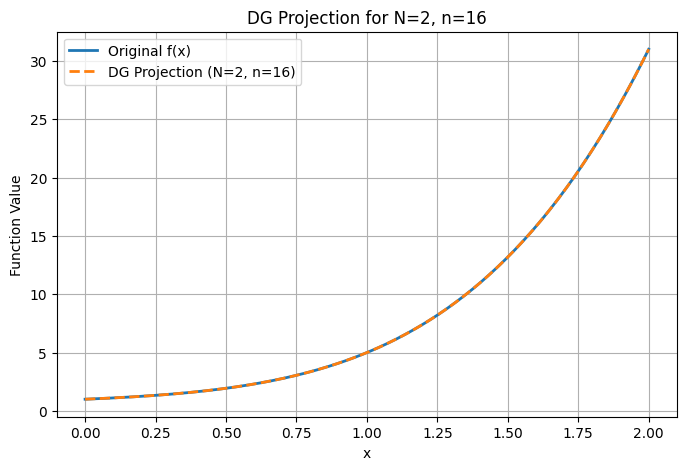

In [12]:
import numpy as np
import scipy.integrate as spi
import scipy.special as sp
import matplotlib.pyplot as plt

# 定義原函數
def f(x):
    return 1 + x + x**2 + x**3 + x**4

# 計算 DG 投影的係數 (c_kn)
def compute_dg_coefficients(n, N):
    x_nodes = np.linspace(0, 2, n + 1)  # 劃分區間
    c_kn = np.zeros((n, N + 1))  # 存儲係數

    for k in range(n):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        h = x_kp1 - x_k  # 區間長度

        # 計算內積來獲取 c_kn
        for m in range(N + 1):
            Pm = lambda x: sp.legendre(m)(2 * (x - x_k) / h - 1)  # Legendre 多項式
            integrand = lambda x: f(x) * Pm(x)  # 內積
            integral, _ = spi.quad(integrand, x_k, x_kp1)  # 積分
            c_kn[k, m] = (2 * m + 1) / h * integral  # 係數計算

    return x_nodes, c_kn

# 在區間 [x_k, x_{k+1}] 上計算投影函數
def f_proj(x, c_kn, x_nodes, N):
    """ 計算 DG 投影函數值 """
    n = len(x_nodes) - 1

    for k in range(n):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]
        if x_k <= x < x_kp1 or (x == 2 and k == n - 1):  # 確保 x=2 被包含
            h = x_kp1 - x_k
            xi = 2 * (x - x_k) / h - 1  # 轉換到標準區間 [-1,1]
            return sum(c_kn[k, m] * sp.legendre(m)(xi) for m in range(N + 1))

    return 0  # 萬一 x 超出範圍，回傳 0

# 設定 n=16 進行 DG 投影
N = 2  # Legendre 多項式階數
n = 16  # 設定區間數量
x_nodes, c_kn = compute_dg_coefficients(n, N)

# 產生繪圖點
x_vals = np.linspace(0, 2, 200)  # 產生 200 個 x 點
f_vals = np.array([f(x) for x in x_vals])
f_proj_vals = np.array([f_proj(x, c_kn, x_nodes, N) for x in x_vals])

# 繪製原函數與 DG 投影
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label="Original f(x)", linewidth=2)
plt.plot(x_vals, f_proj_vals, '--', label=f"DG Projection (N={N}, n={n})", linewidth=2)
plt.xlabel("x")
plt.ylabel("Function Value")
plt.title(f"DG Projection for N={N}, n={n}")
plt.legend()
plt.grid()
plt.show()



n = 8, L2 error: 0.002297
n = 16, L2 error: 0.000287
n = 24, L2 error: 0.000085
n = 32, L2 error: 0.000036


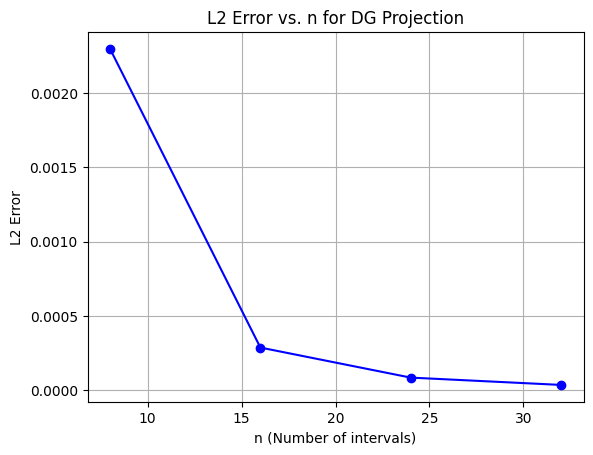

In [11]:
def compute_L2_error(f, f_proj, c_kn, x_nodes, N):
    error_sq = 0.0

    for k in range(len(x_nodes) - 1):
        x_k, x_kp1 = x_nodes[k], x_nodes[k + 1]

        error_func = lambda x: (f(x) - f_proj(x, c_kn, x_nodes, N))**2
        integral, _ = spi.quad(error_func, x_k, x_kp1)  # 數值積分
        error_sq += integral  # 加總各區間的誤差

    return np.sqrt(error_sq)


N = 2  # Legendre 多項式階數
n_values = 8, 16, 24, 32  # 測試 n = 5 到 50
L2_errors = []


for n in n_values:
    x_nodes, c_kn = compute_dg_coefficients(n, N)
    L2_error = compute_L2_error(f, f_proj, c_kn, x_nodes, N)
    L2_errors.append(L2_error)
    print(f"n = {n}, L2 error: {L2_error:.6f}")

# 繪製 L2 誤差隨 n 變化的圖
plt.figure()
plt.plot(n_values, L2_errors, marker='o', linestyle='-', color='b')
plt.xlabel("n (Number of intervals)")
plt.ylabel("L2 Error")
plt.title("L2 Error vs. n for DG Projection")
plt.grid()
plt.show()